# Differentiating Between Linear and Logistic Regression

## Defining the logistic function

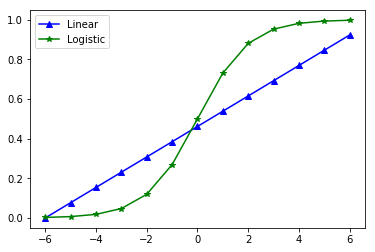

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from math import exp

x_values = range(-6, 7)
lin_values = [(0 + 1*x) / 13 for x in range(0, 13)]
log_values = [exp(0 + 1*x) / (1 + exp(0 + 1*x)) 
              for x in x_values]

plt.plot(x_values, lin_values, 'b-^')
plt.plot(x_values, log_values, 'g-*')
plt.legend(['Linear', 'Logistic'])
plt.show()

## Fitting the curve

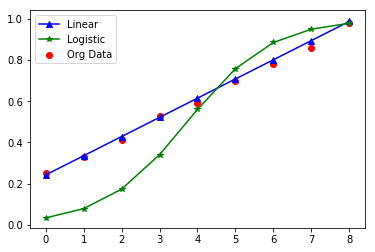

In [2]:
x1 = range(0,9)
y1 = (0.25, 0.33, 0.41, 0.53, 0.59, 
      0.70, 0.78, 0.86, 0.98)
plt.scatter(x1, y1, c='r')

lin_values = [0.242 + 0.0933*x for x in x1]
log_values = [exp(0.242 + .9033*x) / 
              (1 + exp(0.242 + .9033*x)) 
              for x in range(-4, 5)]

plt.plot(x1, lin_values, 'b-^')
plt.plot(x1, log_values, 'g-*')
plt.legend(['Linear', 'Logistic', 'Org Data'])
plt.show()

## Considering a pass/fail example

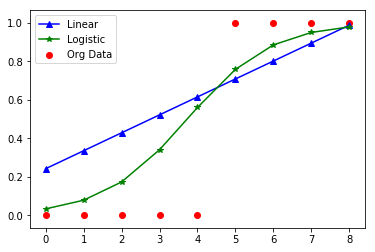

In [3]:
y2 = [0 if x < 0.70 else 1 for x in y1]
plt.scatter(x1, y2, c='r')

lin_values = [0.242 + 0.0933*x for x in x1]
log_values = [exp(0.242 + .9033*x) / 
              (1 + exp(0.242 + .9033*x)) 
              for x in range(-4, 5)]

plt.plot(x1, lin_values, 'b-^')
plt.plot(x1, log_values, 'g-*')
plt.legend(['Linear', 'Logistic', 'Org Data'])
plt.show()

# Using Logistic Regression to Guess Classes

## Applying logistic regression

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:-1,:]
y = iris.target[:-1]

In [5]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)
single_row_pred = logistic.predict(
    iris.data[-1, :].reshape(1, -1))
single_row_pred_proba = logistic.predict_proba(
    iris.data[-1, :].reshape(1, -1))
print ('Predicted class %s, real class %s' 
       % (single_row_pred, iris.target[-1]))
print ('Probabilities for each class from 0 to 2: %s' 
       % single_row_pred_proba)

Predicted class [2], real class 2
Probabilities for each class from 0 to 2: [[0.00168787 0.28720074 0.71111138]]


## Considering when classes are more

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
train = range(0, 1700)
test = range(1700, len(digits.data))
X = digits.data[train]
y = digits.target[train]
tX = digits.data[test]
ty = digits.target[test]

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
OVR = OneVsRestClassifier(LogisticRegression()).fit(X, y)
OVO = OneVsOneClassifier(LogisticRegression()).fit(X, y)
print('One vs rest accuracy: %.3f' % OVR.score(tX, ty))
print('One vs one accuracy: %.3f' % OVO.score(tX, ty))

One vs rest accuracy: 0.938
One vs one accuracy: 0.969


# Switching to Probabilities

## Specifying a binary response

In [8]:
import numpy as np

a = np.array([0, 0, 0, 0, 1, 1, 1, 1])
b = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(8,1)
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(b,a)
print (regression.predict(b)>0.5)

[False False False False  True  True  True  True]


## Transforming numeric estimates into probabilities

In [9]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
boston = load_boston()
X, y = scale(boston.data), boston.target

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

binary_y = np.array(y >= 40).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, 
            binary_y, test_size=0.33, random_state=5)
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print('In-sample accuracy: %0.3f' % 
      accuracy_score(y_train, logistic.predict(X_train)))
print('Out-of-sample accuracy: %0.3f' % 
      accuracy_score(y_test, logistic.predict(X_test)))

In-sample accuracy: 0.973
Out-of-sample accuracy: 0.958


In [11]:
for var,coef in zip(boston.feature_names,
                    logistic.coef_[0]):
        print ("%7s : %7.3f" %(var, coef))

   CRIM :  -0.006
     ZN :   0.197
  INDUS :   0.580
   CHAS :  -0.023
    NOX :  -0.236
     RM :   1.426
    AGE :  -0.048
    DIS :  -0.365
    RAD :   0.645
    TAX :  -0.220
PTRATIO :  -0.554
      B :   0.049
  LSTAT :  -0.803


In [12]:
print('\nclasses:',logistic.classes_)
print('\nProbs:\n',logistic.predict_proba(X_test)[:3,:])


classes: [0 1]

Probs:
 [[0.39022779 0.60977221]
 [0.93856655 0.06143345]
 [0.98425623 0.01574377]]


# Working through Multiclass Regression

## Developing a multiclass regression implementation

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
irisClass = OneVsRestClassifier(LinearSVC(
    random_state=0)).fit(X, y).predict(X)

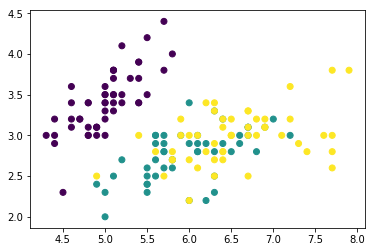

In [15]:
plt.scatter(X[:,0], X[:,1], c=irisClass)
plt.show()